<a href="https://colab.research.google.com/github/priyank21112000/Time-Series-Analysis-Yahoo-stock-price/blob/main/Time_Series_analysis_of_Yahoo_stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Time series analysis is a statistical technique used to analyze and understand data points that are ordered over time. It involves studying the patterns, trends, and relationships within the data over time to identify underlying patterns or factors that may influence the data. In a time series, each data point is associated with a specific time, and the data points are often plotted on a graph over time. Time series analysis can be used to understand how a particular variable changes over time, to make predictions about future values, and to identify relationships between different variables.



Time series data can be decomposed into four main components: trend, seasonal, cyclical, and random.

**Trend**: The trend component represents the long-term direction or movement in the data. It reflects the underlying pattern of the data that persists over time. A trend can be upward, downward, or flat. For example, in a sales data set, if the overall sales have been increasing over time, this indicates an upward trend.

**Seasonal**: The seasonal component represents the periodic fluctuations that occur within the data over a fixed time period, such as a year, a quarter, a month, or a week. It reflects the regular patterns that are repeated over a particular time interval. For example, in a retail sales data set, there may be a seasonal pattern of higher sales during the holiday season.

**Cyclical**: The cyclical component represents the long-term fluctuations that occur over a period longer than one season. These fluctuations are often related to economic or business cycles and reflect changes in the overall business environment. For example, in a stock price data set, there may be a cyclical pattern of fluctuations over several years due to changes in the overall economy.

**Random**: The random component represents the unpredictable or random fluctuations that occur in the data. These fluctuations are often due to factors that cannot be easily explained or predicted. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("yahoo_stock.csv", index_col = 'Date', parse_dates = ['Date'])

In [ ]:
data.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [ ]:
data.tail(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-11-16,3628.510010,3600.159912,3600.159912,3626.909912,5.281980e+09,3626.909912
2020-11-17,3623.110107,3588.679932,3610.310059,3609.530029,4.799570e+09,3609.530029
2020-11-18,3619.090088,3567.330078,3612.090088,3567.790039,5.274450e+09,3567.790039
2020-11-19,3585.219971,3543.840088,3559.409912,3581.870117,4.347200e+09,3581.870117
2020-11-20,3581.229980,3556.850098,3579.310059,3557.540039,2.236662e+09,3557.540039


We have the data from 23rd November 2015 to 20th November 2020

The dataset includes six columns containing information about the stock prices for a given date. These columns are:

High: the highest price the stock reached on that date

Low: the lowest price the stock reached on that date

Open: the price at which the stock opened on that date

Close: the price at which the stock closed on that date

Volume: the total trading activity for that date

AdjClose: adjusted values that account for corporate actions such as dividends, stock splits, and new share issuance.

<AxesSubplot:xlabel='Date'>

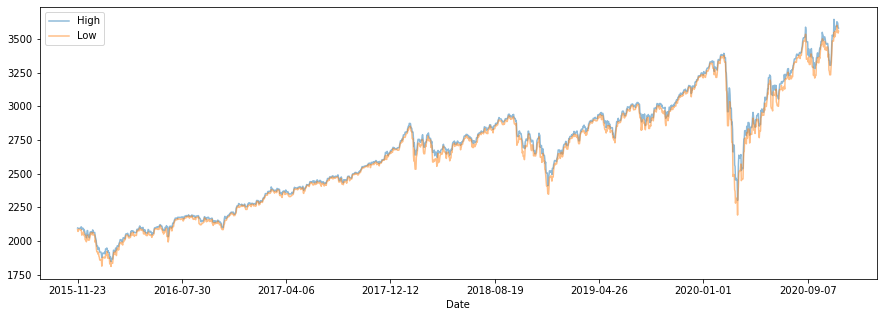

In [ ]:
data[['High', 'Low']].plot(figsize = (15, 5), alpha = 0.5)
#Alphaa is the transparency of the plot. 0 means completely transparent and 1 means opaque

<AxesSubplot:xlabel='Date'>

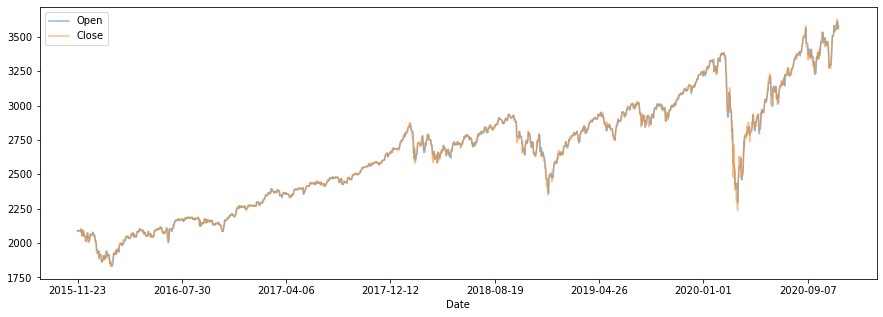

In [ ]:
data[['Open', 'Close']].plot(figsize = (15, 5), alpha = 0.5)

1. Starting from 2016 till 2018 there has been gradual increase in the stock price
2. There are two sharp downfalls in 2019 and in 2020
3. Stock price again started rising from the second half of 2020



Decomposition in time series refers to the process of breaking down a time series into its individual components, such as trend, seasonal, cyclical, and random, to better understand the underlying patterns and relationships in the data.



**Additive decomposition**: In this method, the time series is decomposed into its component parts by adding the individual components together. This is expressed as:

Y(t) = T(t) + S(t) + C(t) + E(t)

where Y(t) is the observed value at time t, T(t) is the trend component, S(t) is the seasonal component, C(t) is the cyclical component, and E(t) is the random or error component.

**Multiplicative decomposition**: In this method, the time series is decomposed into its component parts by multiplying the individual components together. This is expressed as:

Y(t) = T(t) x S(t) x C(t) x E(t)

where Y(t) is the observed value at time t, T(t) is the trend component, S(t) is the seasonal component, C(t) is the cyclical component, and E(t) is the random or error component.

In [ ]:
#Implementing decomposition using Python
from statsmodels.tsa.seasonal import seasonal_decompose
def decompose(data, column_name):
    multiplicative_model = seasonal_decompose(data[column_name], model='multiplicative', extrapolate_trend = 'freq')
    additive_model = seasonal_decompose(data[column_name], model = 'additive', extrapolate_trend='freq')
    plt.rcParams.update({'figure.figsize': (20, 10)})
    multiplicative_model.plot().suptitle('Multiplicative Decompose', fontsize=30)
    additive_model.plot().suptitle('Additive Decompose', fontsize=30)
    plt.show()
    return multiplicative_model, additive_model

#**Decomposition of opening prices of the stock**

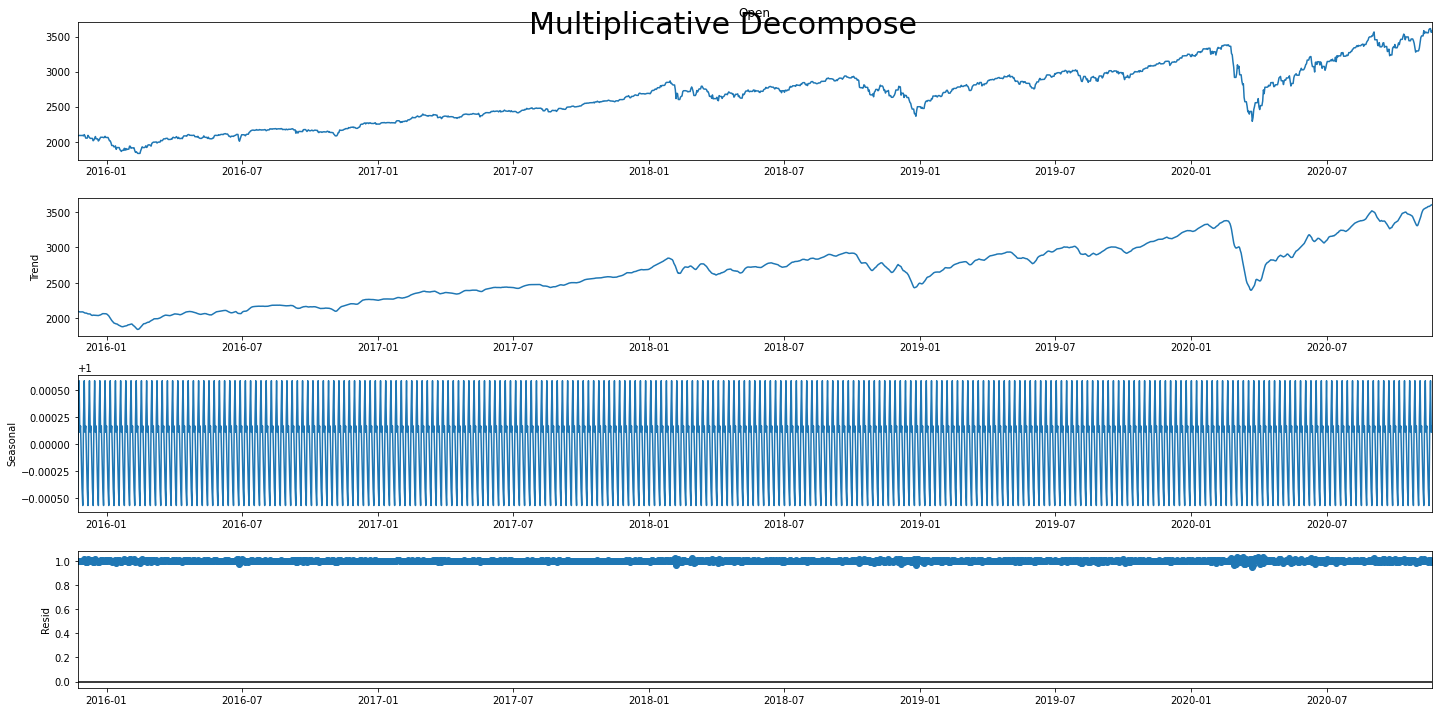

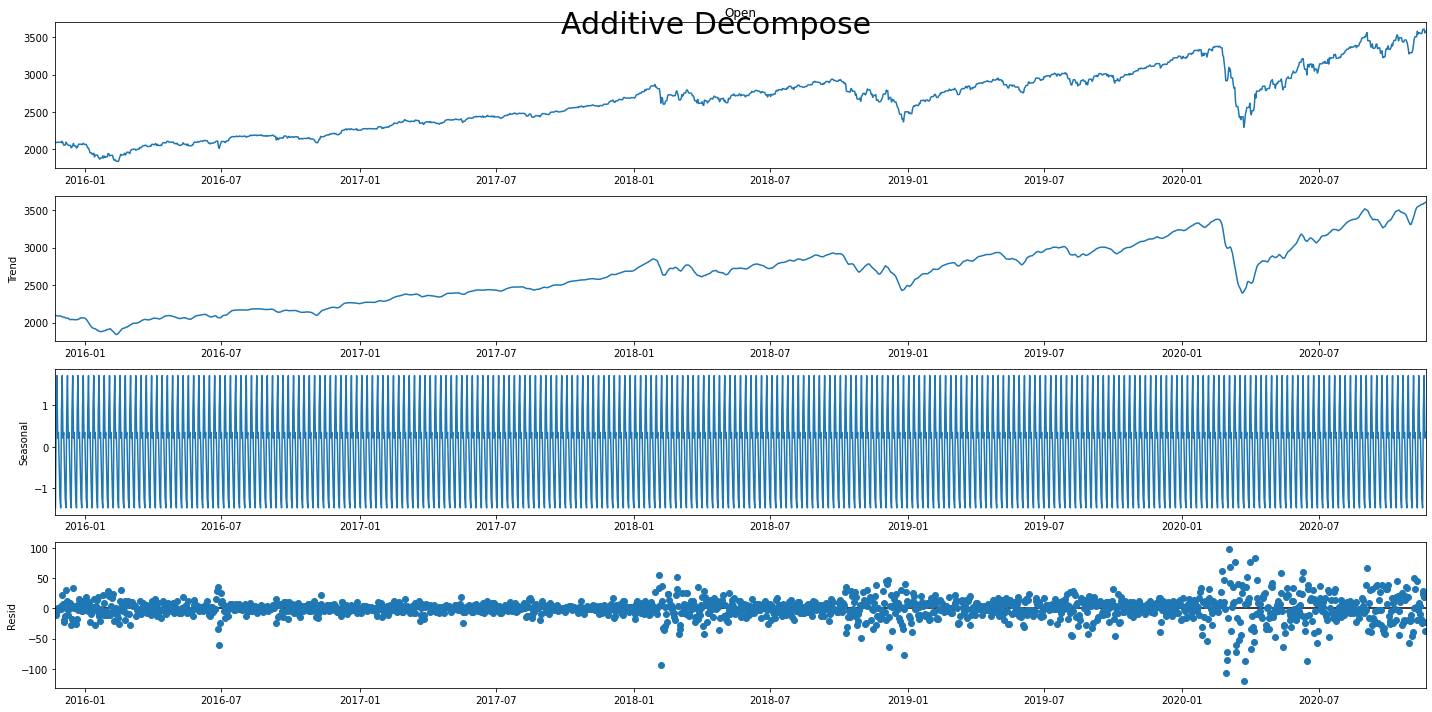

In [ ]:
multiplicative_model, additive_model = decompose(data, 'Open')


#**Decomposition of closing price of the stock**

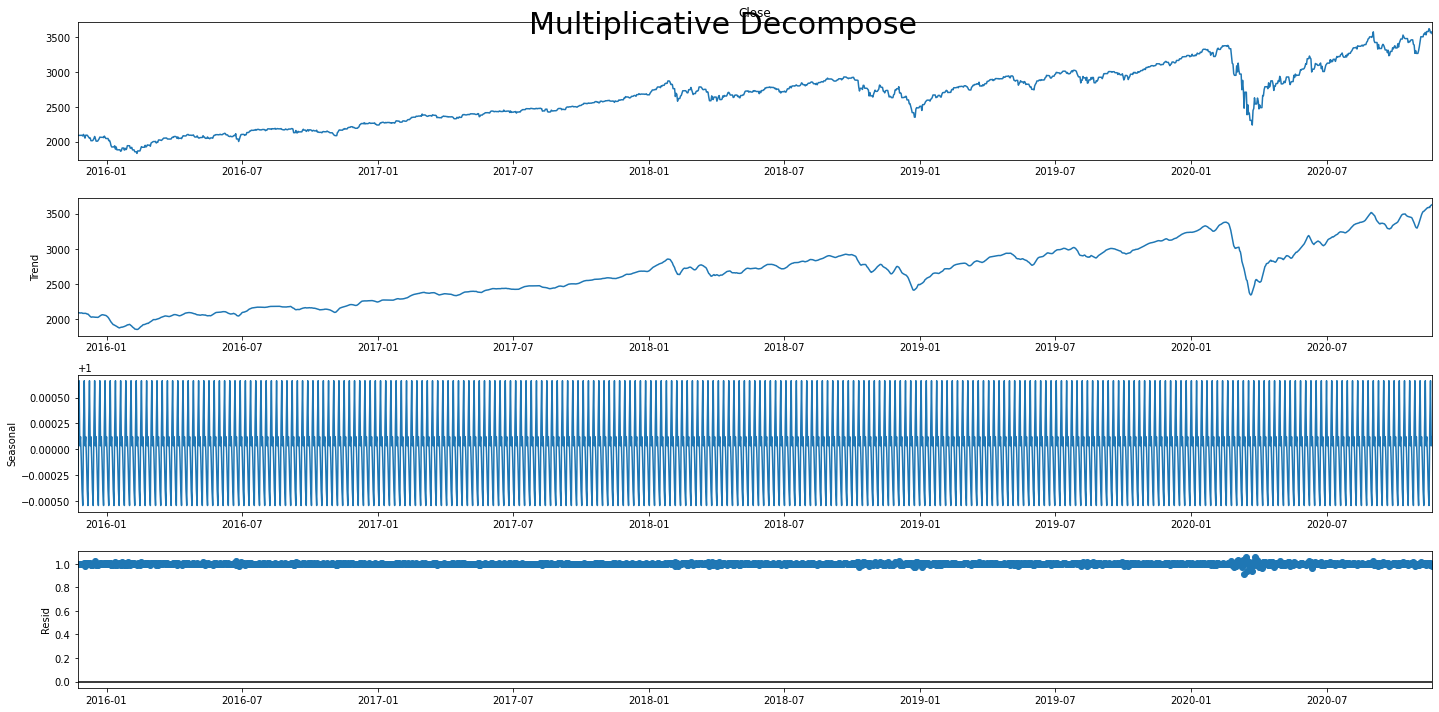

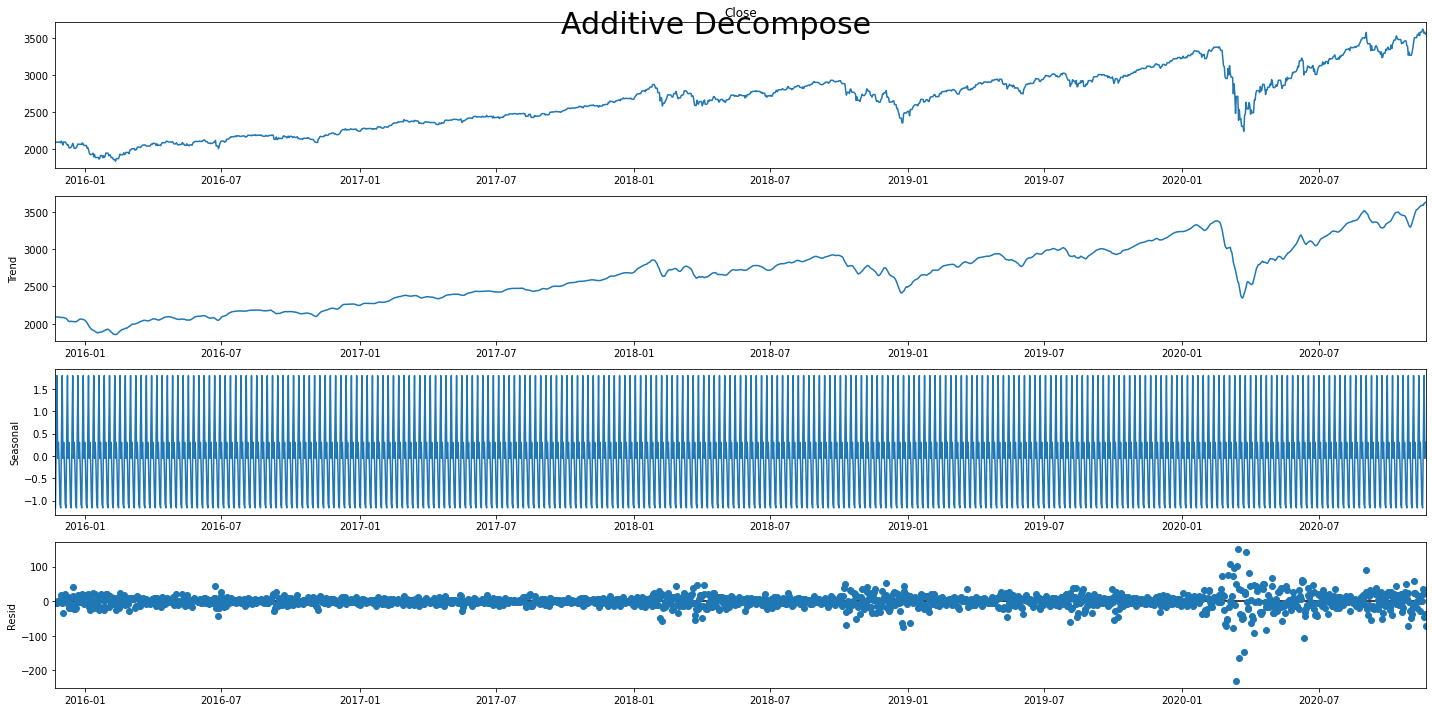

In [ ]:
multiplicative_model, additive_model = decompose(data, 'Close')

The extracted trend and seasonality information from the series appears to be reasonable, based on our analysis. Additionally, the residuals demonstrate periods of heightened variability during the rapid rises and falls in the series, which is noteworthy.

## **Decomposition of everyday high of the stock**

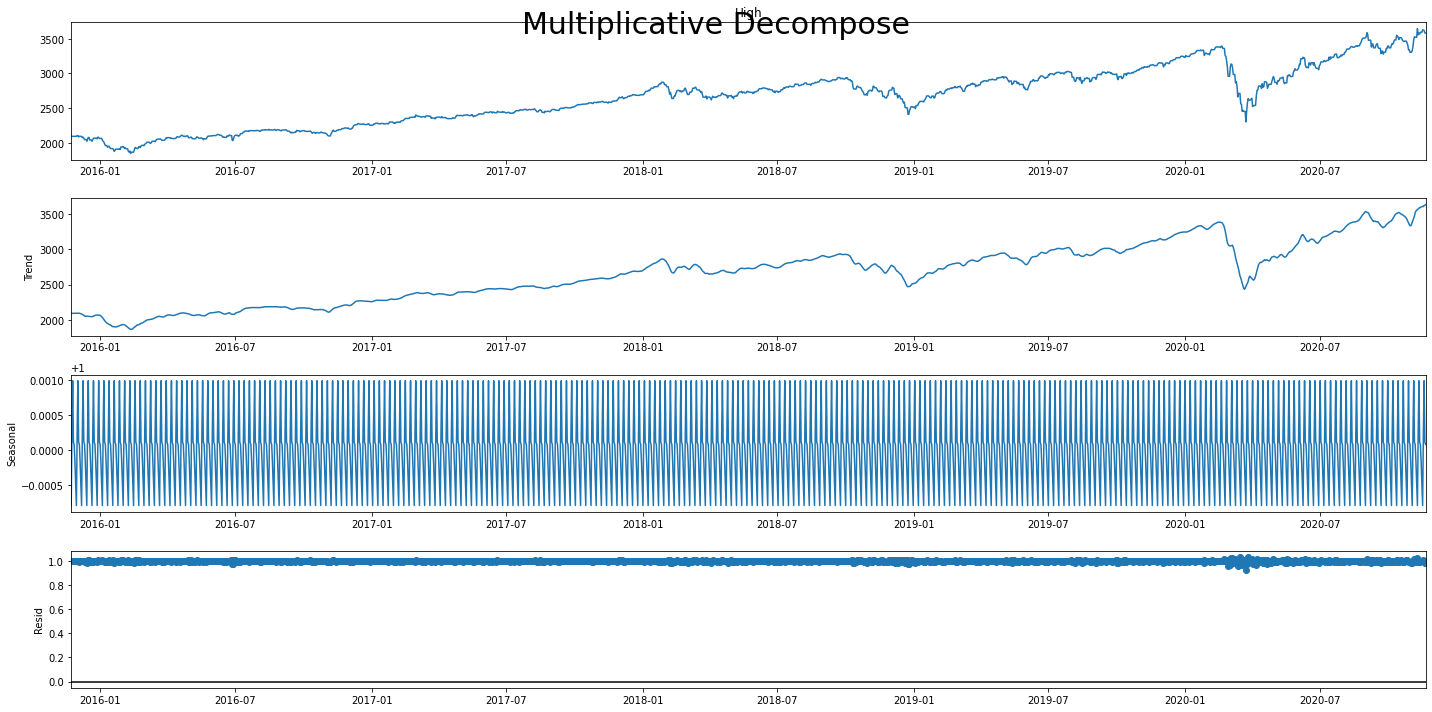

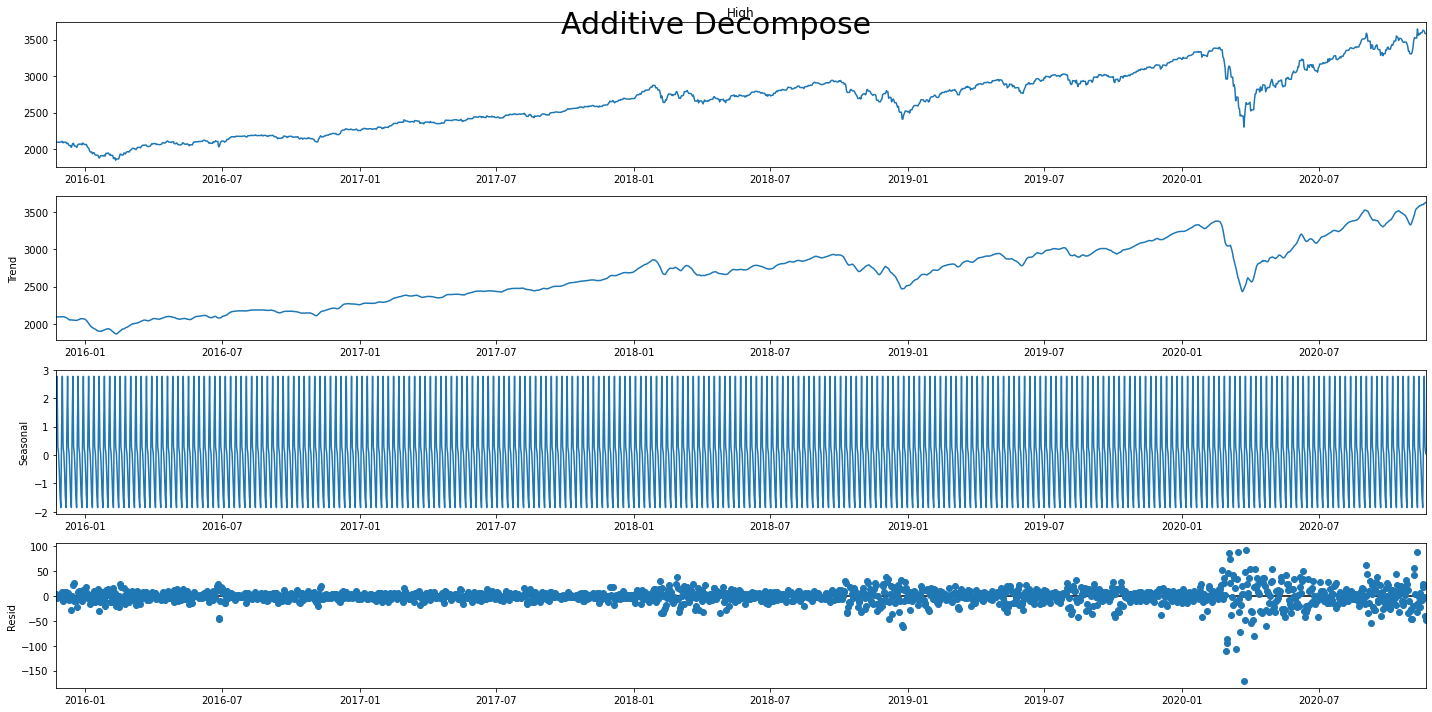

In [ ]:
multiplicative_model, additive_model = decompose(data, 'High')

## **Decomposition of everyday low of the stock**

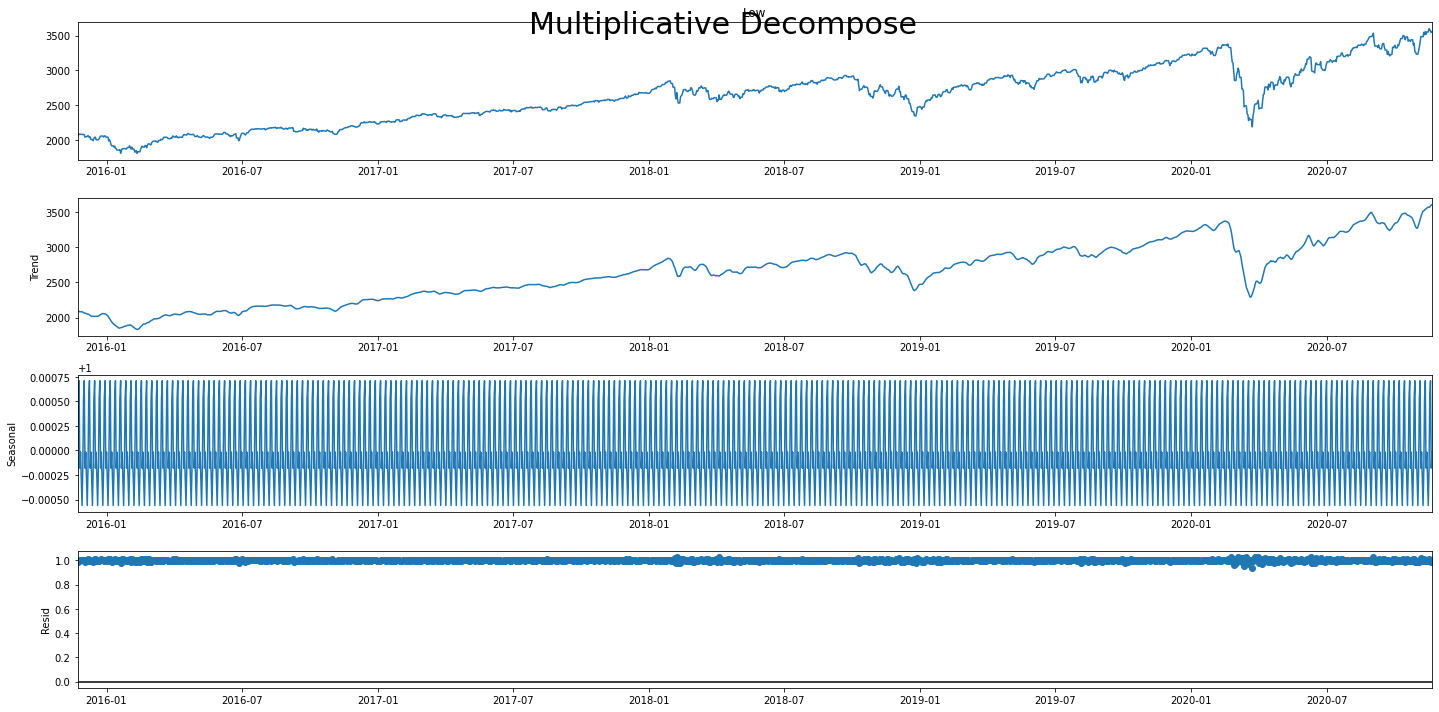

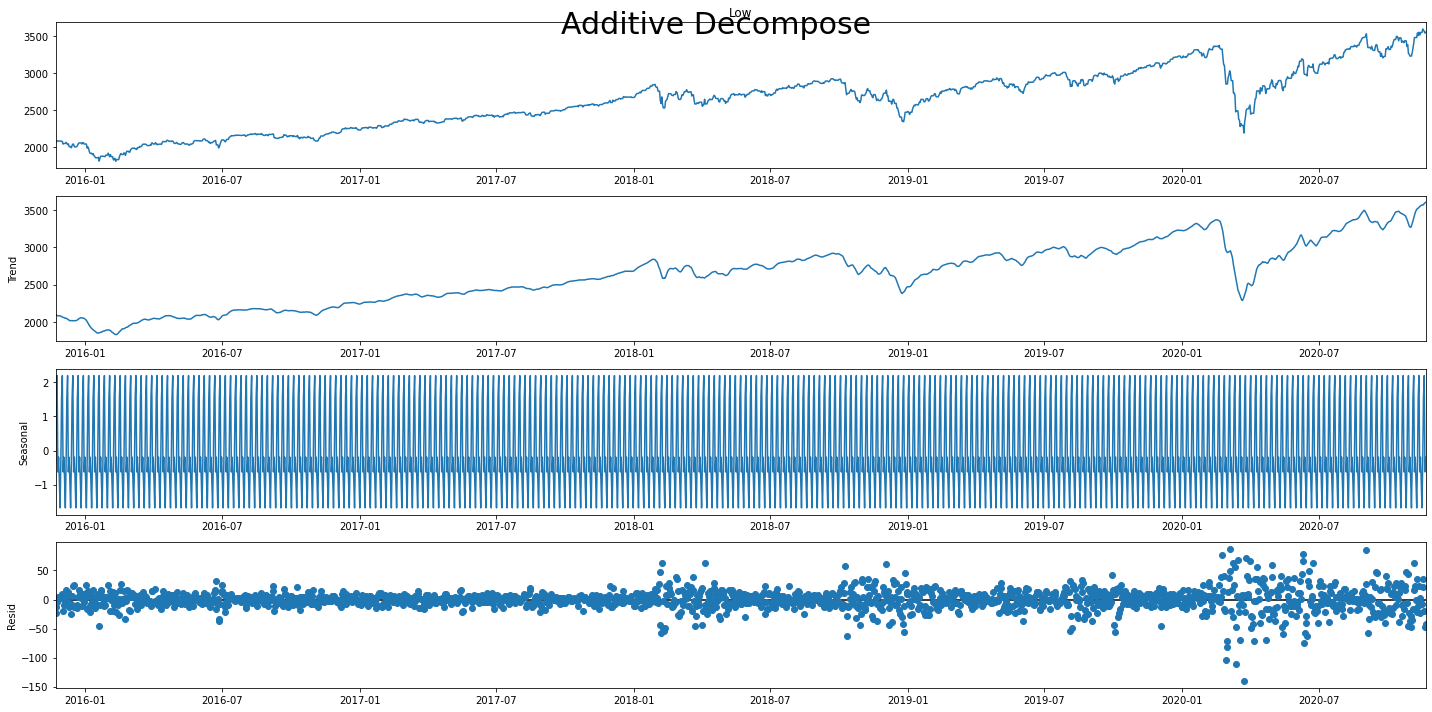

In [ ]:
multiplicative_model, additive_model = decompose(data, 'Low')

In conclusion, a comprehensive time series analysis can be performed by capturing the trend, seasonality, and residuals of the dataset. These parameters can be used to study the time-series dataset or used as features for further analysis. By considering these factors, we can gain valuable insights and make informed decisions based on the trends and patterns observed in the data. Overall, this analysis can provide a deeper understanding of the dataset and help to identify potential opportunities or challenges.